## Path planning with A* Algorithm

 Mobile Robot Path Planning using A* Algorithm
#------------------------------------------------------------------#

 Path planning is crucial for mobile robots to navigate in environments efficiently. 
 A* is a popular search algorithm for finding the shortest path in a grid map, 
 which considers both the cost from the start and the estimated cost to the goal.

### Step 1: Import libraries
 Make sure you have the necessary packages installed. You may need to restart your notebook after the installation.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop # Priority Queue for faster node expansion
show_animation = True  # Enable/Disable visualization

### Step 2: Grid Map Definition

In [30]:
# A grid is used to represent the environment. Each cell can either be an obstacle or free space.

def create_grid(rows, cols, obstacles):
    grid = np.zeros((rows, cols))
    for obstacle in obstacles:
        grid[obstacle] = 1
    return grid

### Step 3: Example Grid Map

In [31]:
# Example of 10x10 grid with some obstacles
rows, cols = 10, 10
obstacles = [(3, 3), (3, 4), (4, 4), (5, 5), (5, 6)]
grid = create_grid(rows, cols, obstacles)

### Step 4: Plotting the Environment

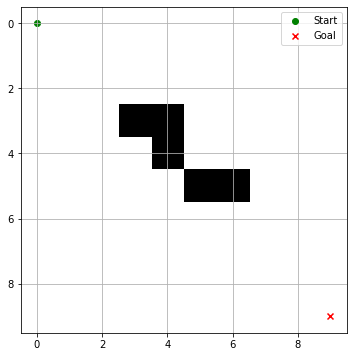

In [32]:
# We can visualize the grid with obstacles.

def plot_grid(grid, start, goal, path=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Greys', origin='upper')
    plt.scatter(start[1], start[0], marker='o', color='green', label="Start")
    plt.scatter(goal[1], goal[0], marker='x', color='red', label="Goal")
    
    if path:
        for point in path:
            plt.scatter(point[1], point[0], marker='.', color='blue')
    
    plt.legend()
    plt.grid(True)
    plt.show()

start = (0, 0)
goal = (9, 9)
plot_grid(grid, start, goal)

### Step 5: A* Algorithm Implementation
The A* algorithm works by maintaining a priority queue of nodes to explore, 
and always expanding the node with the lowest f(x) = g(x) + h(x), 
where g(x) is the cost from start to the current node, and h(x) is the heuristic estimate of cost from current node to goal.

In [33]:
def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    rows, cols = grid.shape
    open_list = []
    heappush(open_list, (0 + heuristic(start, goal), 0, start))
    came_from = {start: None}
    g_score = {start: 0}
    
    while open_list:
        _, current_g, current = heappop(open_list)
        
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]
        
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g = current_g + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, tentative_g, neighbor))
                    came_from[neighbor] = current
    
    return None  # No path found


### Step 6: Finding and Visualizing the Path
Now, we use the A* algorithm to find a path and visualize it.

Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


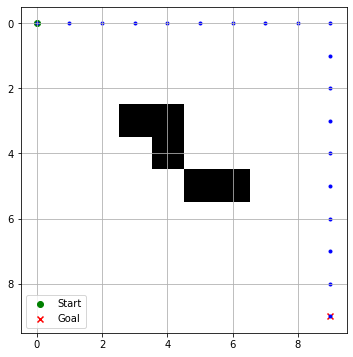

In [34]:
path = a_star(grid, start, goal)
if path:
    print(f"Path found: {path}")
    plot_grid(grid, start, goal, path)
else:
    print("No path found")